https://www.kaggle.com/code/robikscube/tutorial-time-series-forecasting-with-xgboost

In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random

In [47]:
df = pd.read_csv("dummy.csv", index_col='DATETIME')
df.index = pd.to_datetime(df.index, utc=True)
data = df[['aa','bb','cc']]

print(data.tail(10))
print("Earliest Time: ",data.index.min())
print("Latest Point: ",data.index.max())
print("Total Datapoints: ",len(data.index))
split_date = '9/9/2017 0:00'
train = data.loc[data.index <= split_date].copy()
test = data.loc[data.index > split_date].copy()
print("Trainset :", len(train))
print("Trainset :", len(test))

                            aa  bb  cc
DATETIME                              
2017-12-31 14:00:00+00:00  116   8  14
2017-12-31 15:00:00+00:00  191  15  13
2017-12-31 16:00:00+00:00  140  12  12
2017-12-31 17:00:00+00:00   91   7  13
2017-12-31 18:00:00+00:00  225  15  15
2017-12-31 19:00:00+00:00   68   6  12
2017-12-31 20:00:00+00:00   87  13   7
2017-12-31 21:00:00+00:00   77  11   7
2017-12-31 22:00:00+00:00   68   8   9
2017-12-31 23:00:00+00:00  125  11  11
Earliest Time:  2016-12-30 09:00:00+00:00
Latest Point:  2017-12-31 23:00:00+00:00
Total Datapoints:  8799
Trainset : 6064
Trainset : 2735


In [48]:
def create_features(df, targetlabel, feats):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df = df.reset_index()
    features = ['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']
           
    for i in range(len(feats)):
        features.append(feats[i])
    print(features)

    X = df[features]
    if targetlabel:
        y = df[targetlabel]
        return X, y
    return X






In [49]:
featscols = ['bb','cc']
targetlabel = 'aa'
X_train, y_train = create_features(train, targetlabel = targetlabel,feats=featscols)
X_test, y_test = create_features(test, targetlabel = targetlabel, feats=featscols)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'bb', 'cc']
['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'bb', 'cc']
(6064, 10)
(6064,)
(2735, 10)
(2735,)


In [50]:
for col in X_train.columns:
    X_train[col] = X_train[col].astype(float)
for col in X_test.columns:
    X_test[col] = X_test[col].astype(float)

In [51]:
def createInput(X,y,interval):
    FeatCount = X.shape[1]
    x_out=np.zeros(interval*FeatCount)
    #print(x_out.shape)
    y_out=np.zeros(1)
    for point in range(int((len(X)-interval-1))):
        s = point
        e = s+interval
        
        #print("From {} to {}".format(s,e))
        featInput = X_train[s:e]
        target = y.values[e+1]
        #print(featInput.shape)
        flat = featInput.values.flatten()
        print(flat.shape)
        x_out = np.vstack((x_out,flat))
        y_out = np.vstack((y_out,target))
         
    return x_out,y_out

interval=72


X_chunk_train, y_chunk_train = createInput(X_train[-4000:-1],y_train,interval=interval)
X_chunk_test, y_chunk_test = createInput(X_test[:],y_test,interval=interval)

print(X_chunk_train.shape)
print(y_chunk_train.shape)


(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)
(720,)

In [52]:
print(X_chunk_test.shape)
print(y_chunk_test.shape)

(2663, 720)
(2663, 1)


In [53]:
print(X_chunk_train.shape)
print(y_chunk_train.shape)

(3927, 720)
(3927, 1)


In [54]:
reg = xgb.XGBRegressor(n_estimators=1000,max_depth=5)
reg.fit(X_chunk_train, y_chunk_train,
        eval_set=[(X_chunk_train, y_chunk_train), (X_chunk_test, y_chunk_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
res = reg.predict(X_chunk_test)
z = np.zeros(interval)
pred = np.hstack((z,res))


In [56]:
test['predicted'] = pred
pjme_all = pd.concat([test, train], sort=False)
pjme_all.tail()

,aa,bb,cc,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,predicted
DATETIME,,,,,,,,,,,,,
2017-08-12 19:00:00+00:00,50,10,5,2017-08-12 19:00:00+00:00,19,5,3,8,2017,224,12,32,NaN
2017-08-12 20:00:00+00:00,94,7,14,2017-08-12 20:00:00+00:00,20,5,3,8,2017,224,12,32,NaN
2017-08-12 21:00:00+00:00,92,8,11,2017-08-12 21:00:00+00:00,21,5,3,8,2017,224,12,32,NaN
2017-08-12 22:00:00+00:00,168,14,12,2017-08-12 22:00:00+00:00,22,5,3,8,2017,224,12,32,NaN
2017-08-12 23:00:00+00:00,108,8,14,2017-08-12 23:00:00+00:00,23,5,3,8,2017,224,12,32,NaN


In [57]:
test['predicted'].index.min()
test['predicted'].index.max()

Timestamp('2017-12-31 23:00:00+0000', tz='UTC')

In [58]:
pjme_all.head()

,aa,bb,cc,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,predicted
DATETIME,,,,,,,,,,,,,
2017-10-01 00:00:00+00:00,165,15,11,2017-10-01 00:00:00+00:00,0,6,4,10,2017,274,1,39,0.0
2017-10-01 01:00:00+00:00,80,6,14,2017-10-01 01:00:00+00:00,1,6,4,10,2017,274,1,39,0.0
2017-10-01 02:00:00+00:00,94,9,10,2017-10-01 02:00:00+00:00,2,6,4,10,2017,274,1,39,0.0
2017-10-01 03:00:00+00:00,44,5,8,2017-10-01 03:00:00+00:00,3,6,4,10,2017,274,1,39,0.0
2017-10-01 04:00:00+00:00,116,14,8,2017-10-01 04:00:00+00:00,4,6,4,10,2017,274,1,39,0.0


C:\Users\Amir\anaconda3\envs\lstm\lib\site-packages\matplotlib\axis.py:1665: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ret = self.converter.convert(x, self.units, self)


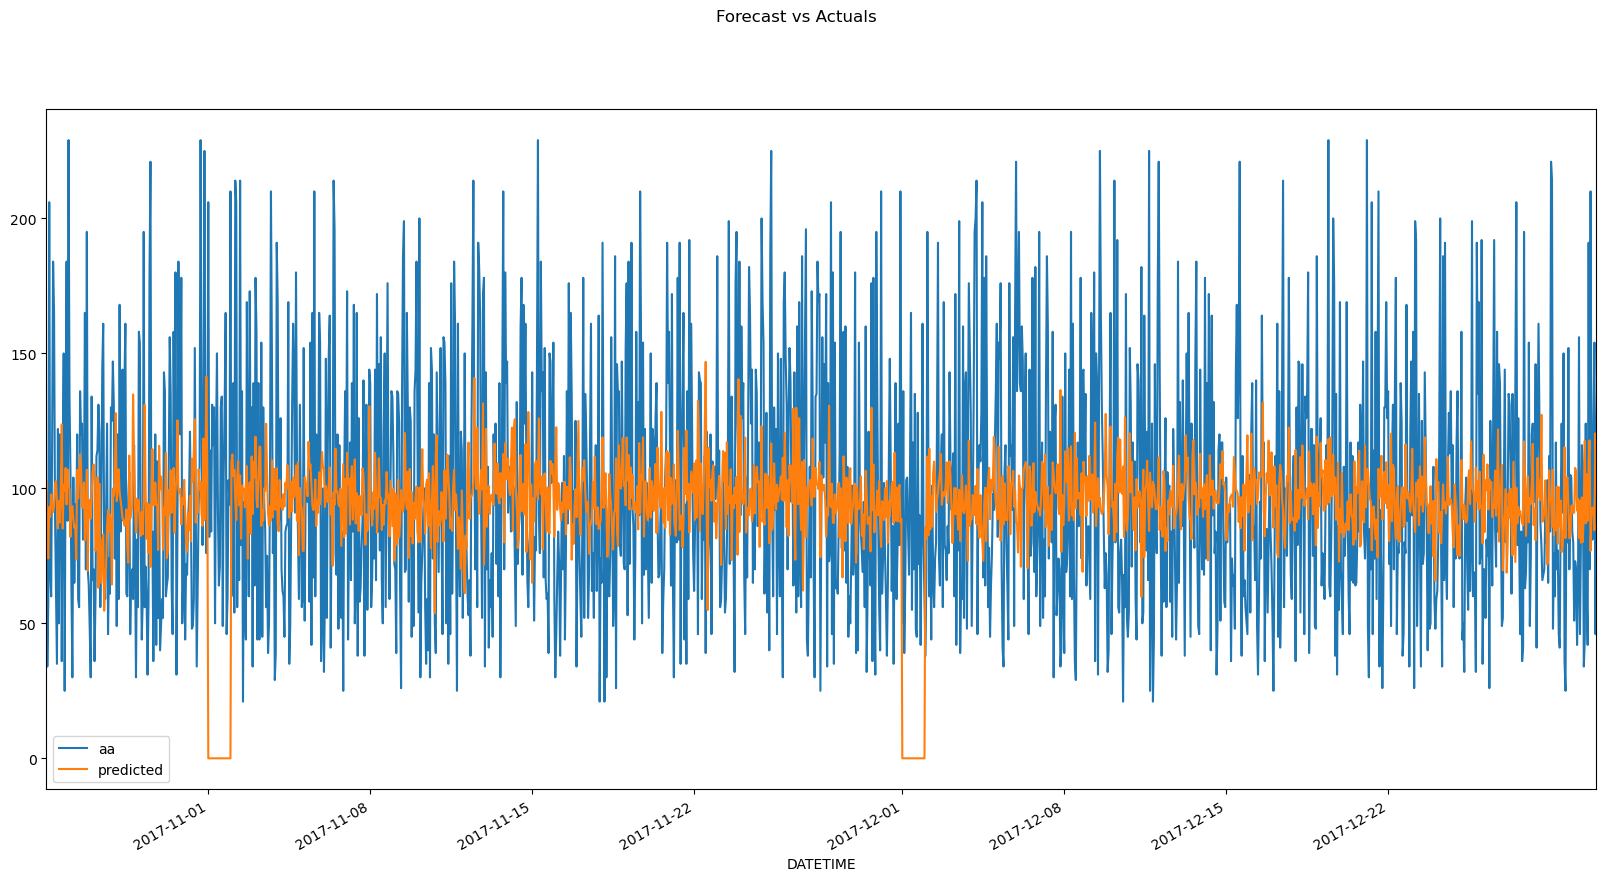

In [59]:
import matplotlib.pyplot as plt

# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(20)
_ = pjme_all[['aa','predicted']].plot(ax=ax, )
ax.set_xbound(lower='25-10-2017', upper='31-12-2017')
#ax.set_ylim(-5,36)
plot = plt.suptitle('Forecast vs Actuals')
